In [ ]:
pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 164.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import pandas as pd
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms.functional as F
from tqdm import tqdm
import rembg
from pathlib import Path
from rembg import remove
from torchvision.transforms import functional as TF
from torchvision.models.detection.rpn import AnchorGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import zipfile


/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
with zipfile.ZipFile('/content/output.zip', 'r') as zip_ref:
    zip_ref.extractall('d2_2025')

In [ ]:
def remove_background_from_folder(input_folder, output_folder):
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    for subfolder in os.listdir(input_folder):
        input_subfolder_path = os.path.join(input_folder, subfolder)
        output_subfolder_path = os.path.join(output_folder, subfolder)
        if not os.path.isdir(input_subfolder_path):
            continue

        Path(output_subfolder_path).mkdir(parents=True, exist_ok=True)
        for filename in os.listdir(input_subfolder_path):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue

            input_path = os.path.join(input_subfolder_path, filename)
            output_filename = os.path.splitext(filename)[0] + '.jpg'
            output_path = os.path.join(output_subfolder_path, output_filename)

            try:
                input_image = Image.open(input_path)
                output_image = remove(input_image)
                output_image.save(output_path)
                print(f"Processed: {input_path} -> {output_path}")
            except Exception as e:
                print(f"Error processing {input_path}: {str(e)}")

input_folder = "/content/ai-unict-2025/train"
output_folder = "/content/ai-unict-2025/train_no_background"
remove_background_from_folder(input_folder, output_folder)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 561GB/s]


Processed: /content/ai-unict-2025/train/01/01_062.png -> /content/ai-unict-2025/train_no_background/01/01_062.png
Processed: /content/ai-unict-2025/train/01/01_181.png -> /content/ai-unict-2025/train_no_background/01/01_181.png
Processed: /content/ai-unict-2025/train/01/01_141.png -> /content/ai-unict-2025/train_no_background/01/01_141.png
Processed: /content/ai-unict-2025/train/01/01_163.png -> /content/ai-unict-2025/train_no_background/01/01_163.png
Processed: /content/ai-unict-2025/train/01/01_076.png -> /content/ai-unict-2025/train_no_background/01/01_076.png
Processed: /content/ai-unict-2025/train/01/01_118.png -> /content/ai-unict-2025/train_no_background/01/01_118.png
Processed: /content/ai-unict-2025/train/01/01_093.png -> /content/ai-unict-2025/train_no_background/01/01_093.png
Processed: /content/ai-unict-2025/train/01/01_101.png -> /content/ai-unict-2025/train_no_background/01/01_101.png
Processed: /content/ai-unict-2025/train/01/01_077.png -> /content/ai-unict-2025/train_no

In [ ]:
def remove_background_from_folder(input_folder, output_folder):
    Path(output_folder).mkdir(parents=True, exist_ok=True)

    for filename in os.listdir(input_folder):
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            continue

        input_path = os.path.join(input_folder, filename)
        output_filename = os.path.splitext(filename)[0] + '.jpg'
        output_path = os.path.join(output_folder, output_filename)

        try:
            input_image = Image.open(input_path)
            output_image = remove(input_image)
            output_image.save(output_path)
            print(f"Processed: {input_path} -> {output_path}")
        except Exception as e:
            print(f"Error processing {input_path}: {str(e)}")
input_folder = "test"
output_folder = "test_noback"
remove_background_from_folder(input_folder, output_folder)

In [ ]:
 # ---- PARAMETRI ----
IMG_SIZE = 224
CSV_PATH = "/content/d2_2025/train.csv"
IMAGES_DIR = "/content/d2_2025/output"
TEST_DIR = "/content/d2_2025/test_noback"
SUBMISSION_PATH = "/content/submission(v4).csv"
MODEL_PATH = "/content/best_model_mixed(solutionv4).pth"
BATCH_SIZE = 32
EPOCHS = 5
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH_detector = "/content/detector.pth"

class DetectorDataset(Dataset):
    def __init__(self, csv_path, images_dir):
        df = pd.read_csv(csv_path)
        self.images_dir = images_dir
        self.items = df.values.tolist()

    def __getitem__(self, idx):
        row = self.items[idx]
        img_path = os.path.join(self.images_dir, row[0])
        img = Image.open(img_path).convert("RGB")
        box = torch.tensor([[row[1], row[2], row[3], row[4]]], dtype=torch.float32)
        label = torch.tensor([1], dtype=torch.int64)
        return TF.to_tensor(img), {"boxes": box, "labels": label}

    def __len__(self):
        return len(self.items)

def get_detector():
    anchor_generator = AnchorGenerator(
    sizes=((32,), (64,), (128,), (256,), (512,)),
    aspect_ratios=((0.5, 1.0, 2.0),) * 5
    )
    model = fasterrcnn_resnet50_fpn(pretrained=False, rpn_anchor_generator=anchor_generator)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    return model


def train_detector():
    dataset = DetectorDataset(CSV_PATH, IMAGES_DIR)
    dataloader = DataLoader(dataset, BATCH_SIZE, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
    model = get_detector().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    model.train()
    for epoch in range(EPOCHS):
        for imgs, targets in tqdm(dataloader, desc=f"Detector Epoch {epoch+1}"):
            imgs = [img.to(DEVICE) for img in imgs]
            targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
            loss_dict = model(imgs, targets)
            losses = sum(loss for loss in loss_dict.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

    torch.save(model.state_dict(), MODEL_PATH_detector)
    return model

def detect_and_crop(model, test_dir, output_dir):
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    model.eval()
    model.to(DEVICE)

    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor()
    ])

    filenames = sorted(os.listdir(test_dir))
    for fname in tqdm(filenames, desc="Detecting test set"):
        img_path = os.path.join(test_dir, fname)
        img = Image.open(img_path).convert("RGB")
        img_tensor = F.to_tensor(img).to(DEVICE)

        with torch.no_grad():
            pred = model([img_tensor])[0]
            if len(pred['boxes']) == 0:
                continue
            box = pred['boxes'][0].cpu().int().tolist()
            crop = img.crop((box[0], box[1], box[2], box[3]))
            crop = transform(crop)
            base_name = os.path.splitext(fname)[0]
            save_path = os.path.join(output_dir, f"{base_name}.jpg")
            transforms.ToPILImage()(crop).save(save_path)



In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, csv_path, images_dir, transform):
        df = pd.read_csv(csv_path)
        self.images_dir = images_dir
        self.items = df.values.tolist()
        self.transform = transform

    def __getitem__(self, idx):
        row = self.items[idx]
        img_path = os.path.join(self.images_dir, row[0])
        img = Image.open(img_path).convert("RGB")
        box = [int(v) for v in row[1:5]]
        label = int(row[5])
        img = img.crop((box[0], box[1], box[2], box[3]))
        img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.items)

class SimpleClassifier(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(64 * (IMG_SIZE // 8) * (IMG_SIZE // 8), 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

def train_classifier():
    base_df = pd.read_csv(CSV_PATH)
    unique_images = base_df['image'].unique()
    train_imgs, val_imgs = train_test_split(
        unique_images, test_size=0.2, random_state=42
    )

    train_df = base_df[base_df['image'].isin(train_imgs)]
    val_df = base_df[base_df['image'].isin(val_imgs)]
    train_df.to_csv("train_temp.csv", index=False)
    val_df.to_csv("val_temp.csv", index=False)

    train_transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor()
    ])

    val_transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor()
    ])

    train_dataset = ClassifierDataset("train_temp.csv", IMAGES_DIR, train_transform)
    val_dataset = ClassifierDataset("val_temp.csv", IMAGES_DIR, val_transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    model = SimpleClassifier().to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    train_losses, val_losses = [], []

    for epoch in range(EPOCHS):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for imgs, labels in tqdm(train_loader, desc=f"Train Epoch {epoch+1}"):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_losses.append(running_loss / len(train_loader))
        print(f"[Train] Epoch {epoch+1}: Loss={train_losses[-1]:.4f}, Acc={correct/total:.4f}")

        model.eval()
        val_loss = 0.0
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        print(f"[Val] Epoch {epoch+1}: Loss={val_losses[-1]:.4f},Acc={val_correct/val_total:.4f}")

    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.grid(True)
    plt.savefig("/content/loss_curve.png")
    plt.show()

    torch.save(model.state_dict(), MODEL_PATH_class)
    return model


def generate_submission(classifier_model):
    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor()
    ])

    classifier_model.eval()
    classifier_model.to(DEVICE)

    results = []
    filenames = sorted(os.listdir("/content/test_crops"))
    for fname in filenames:
        path = os.path.join("test_crops", fname)
        img = Image.open(path).convert("RGB")
        img = transform(img).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            output = classifier_model(img)
            pred = torch.argmax(output, dim=1).item()

        results.append((fname, pred))

    df = pd.DataFrame(results, columns=["image", "class"])
    df = df.drop_duplicates(subset="image")
    df.to_csv(SUBMISSION_PATH, index=False)

Train Epoch 1: 100%|██████████| 40/40 [00:10<00:00,  3.76it/s]


[Train] Epoch 1: Loss=1.3300, Acc=0.5352
[Val] Epoch 1: Loss=1.5807


Train Epoch 2: 100%|██████████| 40/40 [00:10<00:00,  3.76it/s]


[Train] Epoch 2: Loss=0.6579, Acc=0.8000
[Val] Epoch 2: Loss=0.5055


Train Epoch 3: 100%|██████████| 40/40 [00:10<00:00,  3.69it/s]


[Train] Epoch 3: Loss=0.4306, Acc=0.8633
[Val] Epoch 3: Loss=0.3711


Train Epoch 4: 100%|██████████| 40/40 [00:10<00:00,  3.69it/s]


[Train] Epoch 4: Loss=0.3758, Acc=0.8773
[Val] Epoch 4: Loss=0.2894


Train Epoch 5: 100%|██████████| 40/40 [00:10<00:00,  3.71it/s]


[Train] Epoch 5: Loss=0.3055, Acc=0.9039
[Val] Epoch 5: Loss=0.2660


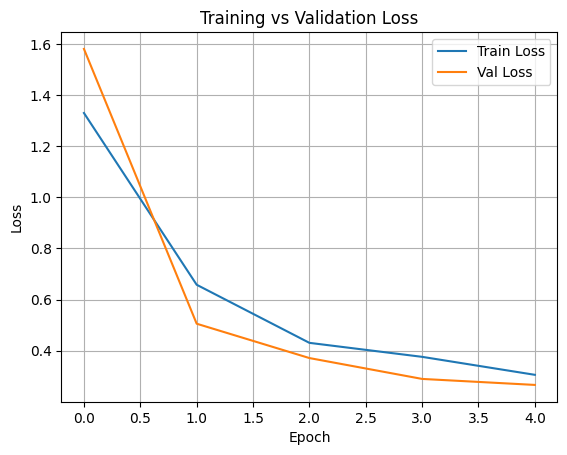

In [ ]:
if __name__ == "__main__":
    detector = train_detector()
    detect_and_crop(detector, TEST_DIR, "test_crops")
    classifier = train_classifier()
    generate_submission(classifier)